In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#실행 후 런타임 다시시작

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
c2016 = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터2016')
c2017 = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터2017')
c2018 = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터2018')
c2019 = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터2019')
c2020 = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터2020')
c2021 = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터2021')

In [ ]:
c_all = pd.concat([c2016, c2017, c2018, c2019, c2020, c2021])
c_all

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,ITEM_F001,ITEM_F002,ITEM_F003,ITEM_F004,ITEM_F005,ITEM_F006,ITEM_F007,ITEM_F008,ITEM_F009,ITEM_F010,ITEM_F011,ITEM_F012,ITEM_F013,ITEM_F014,ITEM_F015,ITEM_F016,ITEM_F017,ITEM_F018,ITEM_F019,ITEM_F020,ITEM_F021,ITEM_F022,ITEM_F023,ITEM_F024,ITEM_F025,ITEM_F026,ITEM_F027,ITEM_F028,ITEM_F029,ITEM_F030,ITEM_F031,ITEM_F032,ITEM_F033,ITEM_F034,ITEM_F035,ITEM_F036,ITEM_F037,ITEM_F038,ITEM_F039,ITEM_F040,ITEM_F041
0,1,청주,성인,일반,61.0,인바디,3등급,20160108,F,157.7,58.00,36.1,84.1,96.0,152.0,24.1,25.1,NaN,NaN,NaN,17.3,NaN,NaN,NaN,NaN,NaN,23.3,18.0,16.0,14.79,128.0,NaN,NaN,NaN,NaN,NaN,43.2,NaN,30.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,47.7,NaN,NaN
1,4,순천,성인,일반,40.0,인바디,3등급,20160127,F,158.3,63.54,30.5,81.3,74.0,126.0,28.1,33.8,NaN,NaN,NaN,16.4,NaN,NaN,NaN,NaN,NaN,25.4,24.0,NaN,13.56,156.0,NaN,NaN,NaN,NaN,NaN,53.1,NaN,NaN,74.0,96.0,112.0,NaN,37.5,NaN,NaN,NaN,NaN,NaN,NaN
2,1,달서,노인,일반,74.0,인바디,2등급,20160108,M,161.8,56.44,17.1,74.6,78.0,148.0,33.6,31.4,NaN,NaN,NaN,15.1,NaN,NaN,NaN,NaN,NaN,21.6,NaN,NaN,NaN,NaN,22.0,NaN,126.0,5.8,22.0,59.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.4,47.4,NaN,NaN
3,1,KSPO송파,성인,일반,31.0,인바디,참가증,20160108,M,178.6,73.44,24.4,91.2,69.0,117.0,31.1,34.3,NaN,NaN,NaN,-3.3,NaN,NaN,NaN,NaN,NaN,23.0,41.0,NaN,11.20,188.0,NaN,NaN,NaN,NaN,NaN,46.7,NaN,NaN,79.0,103.0,124.0,167.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,KSPO송파,성인,일반,27.0,인바디,참가증,20160108,F,165.6,54.08,33.9,76.7,65.0,107.0,16.3,19.0,NaN,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,19.7,16.0,NaN,14.59,123.0,NaN,NaN,NaN,NaN,NaN,35.1,NaN,NaN,84.0,129.0,168.0,NaN,35.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84972,1,KSPO송파,성인,일반,20.0,NaN,3등급,20210703,M,172.6,62.00,11.5,71.5,66.0,121.0,45.0,43.8,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,20.8,46.0,NaN,NaN,216.0,NaN,NaN,NaN,NaN,NaN,72.6,NaN,NaN,93.0,110.0,125.0,152.0,50.6,NaN,NaN,NaN,NaN,0.370,NaN
84973,1,KSPO대구,청소년,일반,17.0,NaN,3등급,20210703,M,166.5,69.30,18.5,82.5,67.0,115.0,29.5,37.9,26.0,NaN,NaN,17.2,18.70,0.502,45.648,6.0,45.924,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.7,NaN,NaN,98.0,111.0,126.0,NaN,47.3,NaN,NaN,NaN,NaN,NaN,NaN
84974,4,KSPO대구,청소년,일반,17.0,NaN,참가증,20210703,M,178.6,80.00,22.6,87.7,64.0,125.0,40.8,43.2,NaN,31.0,NaN,8.2,18.27,0.515,38.589,4.0,38.773,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,88.0,122.0,136.0,NaN,46.1,NaN,NaN,NaN,NaN,NaN,NaN
84975,1,KSPO아산,성인,일반,30.0,NaN,3등급,20210703,M,179.0,84.30,19.6,85.8,71.0,135.0,40.4,45.2,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,26.3,49.0,NaN,NaN,230.0,NaN,NaN,NaN,NaN,NaN,53.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,43.9,NaN,NaN,0.338,NaN


In [ ]:
c_old = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터_노인')
c_adult = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터_성인')
c_adolescent = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터_청소년')
c_youth = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/dataset/가공/체력평가데이터_유소년')

In [ ]:
c_old = c_old[[ 'ITEM_F023', 'ITEM_F025', 'ITEM_F012', 'ITEM_F026', 'ITEM_F027', 'CERT_GBN']]
#체력측정 항목 :  의자에 앉았다 일어서기(근기능, 23), 2분제자리걷기(심폐지구력, 25), 앉아 윗몸 앞으로 굽히기(유연성, 12), 의자앉아  3m표적 돌아오기(평형, 26성), 8자 보행(협응력, 27)
c_old

,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027,CERT_GBN
0,22.0,126.0,15.1,5.80,22.00,2등급
1,7.0,141.0,6.5,6.38,24.99,참가증
2,16.0,0.0,10.2,4.55,21.93,참가증
3,20.0,0.0,-7.3,4.34,18.54,참가증
4,30.0,135.0,19.5,5.40,21.33,1등급
...,...,...,...,...,...,...
169494,21.0,108.0,-2.5,5.77,22.01,참가증
169495,28.0,102.0,9.3,7.08,28.94,참가증
169496,15.0,88.0,-3.8,8.34,27.37,참가증
169497,27.0,119.0,20.0,4.28,19.24,1등급


In [ ]:
c_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169499 entries, 0 to 169498
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ITEM_F023  168591 non-null  float64
 1   ITEM_F025  161321 non-null  float64
 2   ITEM_F012  168939 non-null  float64
 3   ITEM_F026  168799 non-null  float64
 4   ITEM_F027  167787 non-null  float64
 5   CERT_GBN   169499 non-null  object 
dtypes: float64(5), object(1)
memory usage: 7.8+ MB


In [ ]:
##결측값 처리 -> 25 항목만 93%,. 나머지는 99% 이상이므로, 측정 항목별 평균으로 결측값 처리
c_old = c_old.replace(0, np.NaN)
c_old = c_old.fillna(c_old.mean())

In [ ]:
c_rate = c_old['CERT_GBN']

In [ ]:
c_rate

0         2등급
1         참가증
2         참가증
3         참가증
4         1등급
         ... 
169494    참가증
169495    참가증
169496    참가증
169497    1등급
169498    3등급
Name: CERT_GBN, Length: 169499, dtype: object

In [ ]:
df = c_old.drop(['CERT_GBN'], axis = 1)
df

,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
0,22.0,126.000000,15.1,5.80,22.00
1,7.0,141.000000,6.5,6.38,24.99
2,16.0,104.648536,10.2,4.55,21.93
3,20.0,104.648536,-7.3,4.34,18.54
4,30.0,135.000000,19.5,5.40,21.33
...,...,...,...,...,...
169494,21.0,108.000000,-2.5,5.77,22.01
169495,28.0,102.000000,9.3,7.08,28.94
169496,15.0,88.000000,-3.8,8.34,27.37
169497,27.0,119.000000,20.0,4.28,19.24


In [ ]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df) 
df=pd.DataFrame(df,columns=['ITEM_F023', 'ITEM_F025', 'ITEM_F012', 'ITEM_F026', 'ITEM_F027'])
df

,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
0,0.383140,8.808709e-01,0.528799,-0.035057,-0.251222
1,-1.918792,1.499707e+00,-0.350971,-0.006556,-0.085650
2,-0.537632,1.898825e-16,0.027535,-0.096481,-0.255098
3,0.076216,1.898825e-16,-1.762695,-0.106801,-0.442821
4,1.610837,1.252173e+00,0.978914,-0.054712,-0.288324
...,...,...,...,...,...
169494,0.229678,1.382672e-01,-1.271660,-0.036531,-0.250668
169495,1.303913,-1.092674e-01,-0.064534,0.027842,0.133083
169496,-0.691095,-6.868480e-01,-1.404649,0.089758,0.046144
169497,1.150451,5.920806e-01,1.030064,-0.109749,-0.404058


In [ ]:
df = pd.concat([df, c_rate], axis = 1)
df

,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027,CERT_GBN
0,0.383140,8.808709e-01,0.528799,-0.035057,-0.251222,2등급
1,-1.918792,1.499707e+00,-0.350971,-0.006556,-0.085650,참가증
2,-0.537632,1.898825e-16,0.027535,-0.096481,-0.255098,참가증
3,0.076216,1.898825e-16,-1.762695,-0.106801,-0.442821,참가증
4,1.610837,1.252173e+00,0.978914,-0.054712,-0.288324,1등급
...,...,...,...,...,...,...
169494,0.229678,1.382672e-01,-1.271660,-0.036531,-0.250668,참가증
169495,1.303913,-1.092674e-01,-0.064534,0.027842,0.133083,참가증
169496,-0.691095,-6.868480e-01,-1.404649,0.089758,0.046144,참가증
169497,1.150451,5.920806e-01,1.030064,-0.109749,-0.404058,1등급


In [ ]:
df_c = df['CERT_GBN']
df_c

0         2등급
1         참가증
2         참가증
3         참가증
4         1등급
         ... 
169494    참가증
169495    참가증
169496    참가증
169497    1등급
169498    3등급
Name: CERT_GBN, Length: 169499, dtype: object

In [ ]:
df = df.drop(['CERT_GBN'], axis = 1)
df

,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
0,0.383140,8.808709e-01,0.528799,-0.035057,-0.251222
1,-1.918792,1.499707e+00,-0.350971,-0.006556,-0.085650
2,-0.537632,1.898825e-16,0.027535,-0.096481,-0.255098
3,0.076216,1.898825e-16,-1.762695,-0.106801,-0.442821
4,1.610837,1.252173e+00,0.978914,-0.054712,-0.288324
...,...,...,...,...,...
169494,0.229678,1.382672e-01,-1.271660,-0.036531,-0.250668
169495,1.303913,-1.092674e-01,-0.064534,0.027842,0.133083
169496,-0.691095,-6.868480e-01,-1.404649,0.089758,0.046144
169497,1.150451,5.920806e-01,1.030064,-0.109749,-0.404058


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0, n_components=2,perplexity = 50, early_exaggeration = 15, learning_rate = 500)

In [ ]:
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_results

,tsne1,tsne2
0,-0.713118,36.080490
1,19.049492,13.162760
2,31.113213,-1.037002
3,-20.491190,-25.111738
4,-46.157597,31.379316
...,...,...
169494,-20.928751,-18.590355
169495,-38.638096,4.392694
169496,13.965160,-44.370972
169497,-30.260500,35.846523


In [ ]:
sne = pd.concat([tsne_results, df_c], axis = 1)
sne

,tsne1,tsne2,CERT_GBN
0,-0.713118,36.080490,2등급
1,19.049492,13.162760,참가증
2,31.113213,-1.037002,참가증
3,-20.491190,-25.111738,참가증
4,-46.157597,31.379316,1등급
...,...,...,...
169494,-20.928751,-18.590355,참가증
169495,-38.638096,4.392694,참가증
169496,13.965160,-44.370972,참가증
169497,-30.260500,35.846523,1등급


In [ ]:
sne.to_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/sne data/sne_old2.csv')

In [ ]:
sne = pd.read_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/sne data/sne_old.csv')

In [ ]:
sne_1 = sne[sne['CERT_GBN'] == '1등급']
sne_2 = sne[sne['CERT_GBN'] == '2등급']
sne_3 = sne[sne['CERT_GBN'] == '3등급']
sne_c = sne[sne['CERT_GBN'] == '참가증']


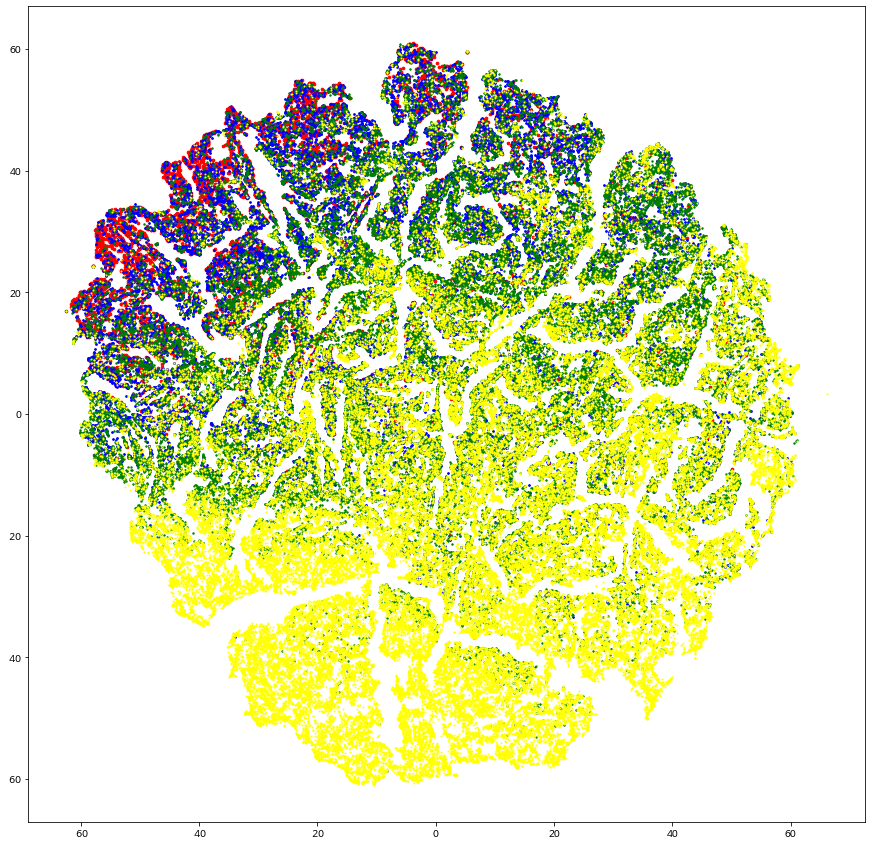

In [ ]:
plt.figure(1, figsize=(15, 15))
plt.scatter(sne_1['tsne1'], sne_1['tsne2'], color='red', s=7)
plt.scatter(sne_2['tsne1'], sne_2['tsne2'], color='blue', s=3)
plt.scatter(sne_3['tsne1'], sne_3['tsne2'], color='green', s=2)
plt.scatter(sne_c['tsne1'], sne_c['tsne2'], color='yellow', s=1)
plt.savefig('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/이미지/노인_뇌')
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
c_old

,CERT_GBN,ITEM_F007,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
0,2등급,33.6,22.0,126.000000,15.1,5.80,22.00
1,참가증,18.3,7.0,141.000000,6.5,6.38,24.99
2,참가증,17.7,16.0,104.648536,10.2,4.55,21.93
3,참가증,35.2,20.0,104.648536,-7.3,4.34,18.54
4,1등급,22.4,30.0,135.000000,19.5,5.40,21.33
...,...,...,...,...,...,...,...
169494,참가증,30.6,21.0,108.000000,-2.5,5.77,22.01
169495,참가증,18.0,28.0,102.000000,9.3,7.08,28.94
169496,참가증,40.4,15.0,88.000000,-3.8,8.34,27.37
169497,1등급,33.0,27.0,119.000000,20.0,4.28,19.24


In [ ]:
import seaborn as sns

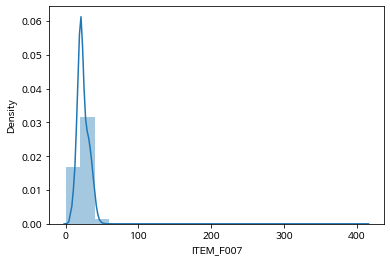

In [ ]:
sns.distplot(c_old['ITEM_F007'], bins=[0, 20, 40, 60, 80, 100])

In [ ]:
c_old['ITEM_F007'].describe()

count    169499.000000
mean         23.855134
std           8.059617
min           0.100000
25%          18.400000
50%          22.600000
75%          29.000000
max         414.000000
Name: ITEM_F007, dtype: float64

In [ ]:
c_old[c_old['ITEM_F007'] == 414]
## ITEM 7 인데, 아마 입력 오류인듯

,CERT_GBN,ITEM_F007,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
64464,2등급,414.0,24.0,124.0,3.8,5.37,23.22


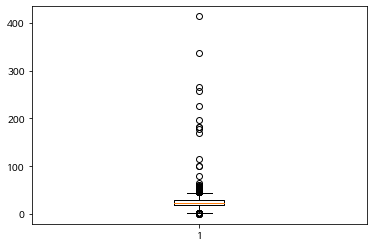

In [ ]:
# Basic box plot
plt.boxplot(c_old['ITEM_F007'])
plt.show()

In [ ]:
c_old[c_old['ITEM_F007'] > 70]

,CERT_GBN,ITEM_F007,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
19478,3등급,197.0,24.0,118.000000,14.80,6.10,21.79
36331,참가증,178.0,24.0,102.000000,7.00,6.48,24.34
37086,참가증,99.9,14.0,100.000000,6.80,6.23,26.30
37127,참가증,99.9,18.0,110.000000,6.35,5.30,26.60
40084,참가증,181.1,32.0,104.648536,10.70,4.76,8.88
48553,참가증,115.0,13.0,98.000000,17.50,5.65,27.03
64464,2등급,414.0,24.0,124.000000,3.80,5.37,23.22
66967,참가증,265.0,12.0,82.000000,-10.80,6.19,31.19
75930,참가증,169.5,20.0,104.648536,18.00,6.72,15.10
79647,1등급,258.0,29.0,129.000000,20.40,4.09,17.26


In [ ]:
index_7 = c_old[c_old['ITEM_F007'] > 70].index
c_old = c_old.drop(index_7)

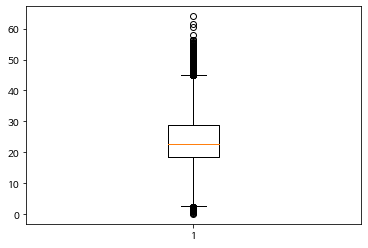

In [ ]:
plt.boxplot(c_old['ITEM_F007'])
plt.show()

In [ ]:
# 의자에 앉았다 일어서기
c_old['ITEM_F023'].describe()

count    169485.000000
mean         19.503238
std           6.516282
min           1.000000
25%          15.000000
50%          19.000000
75%          24.000000
max         411.000000
Name: ITEM_F023, dtype: float64

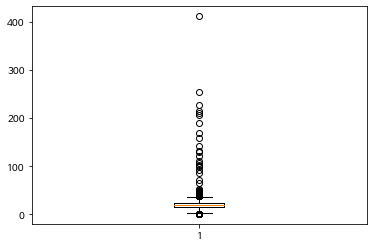

In [ ]:
plt.boxplot(c_old['ITEM_F023'])
plt.show()

In [ ]:
c_old[c_old['ITEM_F023'] > 80]

,CERT_GBN,ITEM_F007,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
27604,2등급,42.3,110.0,110.000000,8.700000,5.45,26.01
36737,3등급,19.9,189.0,75.000000,9.200000,6.22,24.91
39278,참가증,13.4,103.0,100.000000,7.000000,6.80,25.59
39429,참가증,28.4,130.0,72.000000,-4.700000,5.20,20.20
52900,참가증,44.1,122.0,24.000000,9.930838,5.09,23.50
59326,참가증,14.5,253.0,105.000000,9.930838,7.90,31.52
67686,3등급,24.2,141.0,107.000000,15.000000,6.16,27.00
94369,참가증,35.1,93.0,20.000000,-20.000000,7.39,30.31
94515,참가증,6.8,98.0,16.000000,14.500000,8.38,41.70
110048,1등급,27.5,227.0,104.648536,16.200000,4.90,21.70


In [ ]:
index_23 = c_old[c_old['ITEM_F023'] > 80].index
c_old = c_old.drop(index_23)

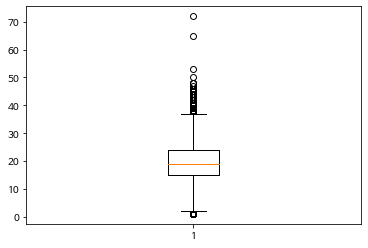

In [ ]:
plt.boxplot(c_old['ITEM_F023'])
plt.show()

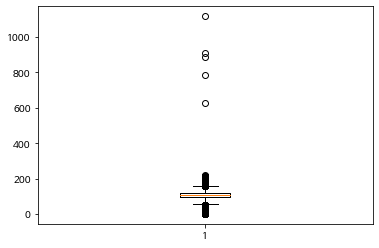

In [ ]:
#2분제자리걷기
plt.boxplot(c_old['ITEM_F025'])
plt.show()

In [ ]:
c_old[c_old['ITEM_F025'] > 500]

,CERT_GBN,ITEM_F007,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
16274,참가증,16.9,8.0,786.0,20.0,8.29,26.33
63435,1등급,22.9,25.0,630.0,21.0,4.88,20.56
74353,참가증,16.3,15.0,1117.0,15.0,8.03,33.54
123285,3등급,18.0,13.0,910.0,6.0,7.00,33.00
141502,3등급,17.2,21.0,888.0,8.9,7.00,26.97


In [ ]:
index_25 = c_old[c_old['ITEM_F025'] > 500].index
c_old = c_old.drop(index_25)

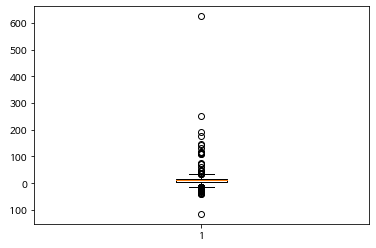

In [ ]:
# 앉아윗몸앞으로굽히기
plt.boxplot(c_old['ITEM_F012'])
plt.show()

In [ ]:
c_old[c_old['ITEM_F012'] > 100]

,CERT_GBN,ITEM_F007,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
29178,3등급,23.0,18.0,112.0,110.0,6.40,30.01
35243,3등급,36.6,19.0,146.0,116.2,6.63,23.75
40659,참가증,24.8,12.0,120.0,176.0,5.99,10.58
53312,2등급,20.5,19.0,107.0,109.0,5.39,19.58
66665,3등급,26.9,22.0,122.0,117.8,4.25,21.19
78737,3등급,21.9,15.0,142.0,145.0,5.27,24.02
106797,3등급,22.2,25.0,110.0,253.0,6.00,22.10
107215,1등급,26.6,23.0,144.0,192.0,4.91,19.15
120210,참가증,25.9,17.0,75.0,113.0,7.03,24.75
134809,참가증,8.0,15.0,100.0,133.0,7.60,27.60


In [ ]:
index_12 = c_old[c_old['ITEM_F012'] > 100].index
c_old = c_old.drop(index_12)

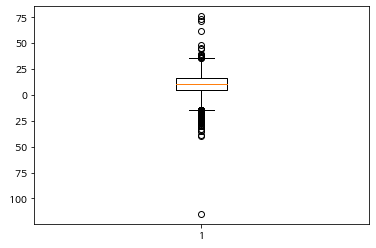

In [ ]:
# 확인
plt.boxplot(c_old['ITEM_F012'])
plt.show()

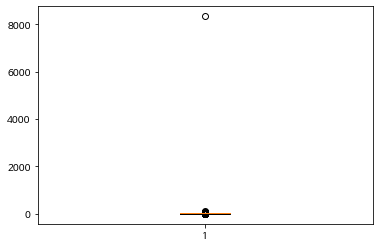

In [ ]:
# 의자에앉아 3M표적 돌아오기
plt.boxplot(c_old['ITEM_F026'])
plt.show()

In [ ]:
c_old[c_old['ITEM_F026'] > 8000]

,CERT_GBN,ITEM_F007,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
136001,참가증,20.5,13.0,84.0,17.5,8347.0,36.44


In [ ]:
c_old = c_old.drop(136001)

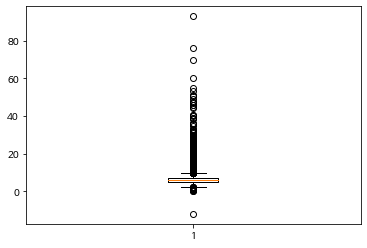

In [ ]:
plt.boxplot(c_old['ITEM_F026'])
plt.show()

In [ ]:
index_26 = c_old[c_old['ITEM_F026'] > 30].index
c_old = c_old.drop(index_26)
index_26_ = c_old[c_old['ITEM_F026'] < 0].index
c_old = c_old.drop(index_26_)

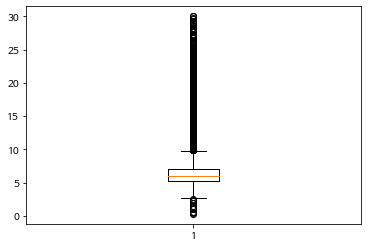

In [ ]:
#확인
plt.boxplot(c_old['ITEM_F026'])
plt.show()

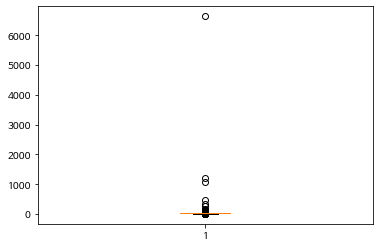

In [ ]:
# 8자보행
plt.boxplot(c_old['ITEM_F027'])
plt.show()

In [ ]:
index_27= c_old[c_old['ITEM_F027'] > 200].index
c_old = c_old.drop(index_27)

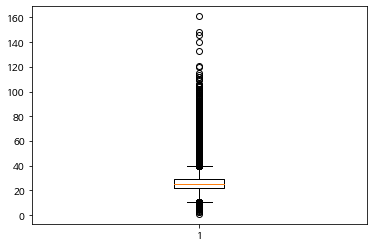

In [ ]:
# 확인
plt.boxplot(c_old['ITEM_F027'])
plt.show()

In [ ]:
c_old 

,CERT_GBN,ITEM_F007,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
0,2등급,33.6,22.0,126.000000,15.1,5.80,22.00
1,참가증,18.3,7.0,141.000000,6.5,6.38,24.99
2,참가증,17.7,16.0,104.648536,10.2,4.55,21.93
3,참가증,35.2,20.0,104.648536,-7.3,4.34,18.54
4,1등급,22.4,30.0,135.000000,19.5,5.40,21.33
...,...,...,...,...,...,...,...
169494,참가증,30.6,21.0,108.000000,-2.5,5.77,22.01
169495,참가증,18.0,28.0,102.000000,9.3,7.08,28.94
169496,참가증,40.4,15.0,88.000000,-3.8,8.34,27.37
169497,1등급,33.0,27.0,119.000000,20.0,4.28,19.24


### T-SNE 시각화

In [ ]:
c_rate = c_old['CERT_GBN']

In [ ]:
df = c_old.drop(['CERT_GBN'], axis = 1)
df

,ITEM_F007,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
0,33.6,22.0,126.000000,15.1,5.80,22.00
1,18.3,7.0,141.000000,6.5,6.38,24.99
2,17.7,16.0,104.648536,10.2,4.55,21.93
3,35.2,20.0,104.648536,-7.3,4.34,18.54
4,22.4,30.0,135.000000,19.5,5.40,21.33
...,...,...,...,...,...,...
169494,30.6,21.0,108.000000,-2.5,5.77,22.01
169495,18.0,28.0,102.000000,9.3,7.08,28.94
169496,40.4,15.0,88.000000,-3.8,8.34,27.37
169497,33.0,27.0,119.000000,20.0,4.28,19.24


In [ ]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df) 
df=pd.DataFrame(df,columns=['ITEM_F007', 'ITEM_F023', 'ITEM_F025', 'ITEM_F012', 'ITEM_F026', 'ITEM_F027'])
df

,ITEM_F007,ITEM_F023,ITEM_F025,ITEM_F012,ITEM_F026,ITEM_F027
0,1.242373,0.400462,0.895582,0.540335,-0.357493,-0.628256
1,-0.705658,-1.990882,1.524281,-0.356567,-0.041475,-0.208131
2,-0.782052,-0.556076,0.000673,0.029310,-1.038565,-0.638092
3,1.446089,0.081616,0.000673,-1.795782,-1.152985,-1.114420
4,-0.183637,1.675845,1.272801,0.999216,-0.575436,-0.722398
...,...,...,...,...,...,...
169397,0.860406,0.241039,0.141143,-1.295186,-0.373839,-0.626851
169398,-0.743855,1.356999,-0.110336,-0.064552,0.339925,0.346883
169399,2.108165,-0.715499,-0.697122,-1.430764,1.026446,0.126282
169400,1.165980,1.197576,0.602189,1.051361,-1.185677,-1.016063


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0, n_components=2,perplexity = 50, early_exaggeration = 15, learning_rate = 500)

In [ ]:
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_results

,tsne1,tsne2
0,-17.574581,-38.848740
1,24.990614,3.382044
2,21.840256,-2.118324
3,-44.045578,-28.783907
4,-46.758102,4.788898
...,...,...
169397,-43.084351,-22.500162
169398,25.354507,-9.201296
169399,-62.464424,6.615118
169400,-38.170635,8.403688


In [ ]:
c_rate = c_rate.reset_index()
c_rate

,index,CERT_GBN
0,0,2등급
1,1,참가증
2,2,참가증
3,3,참가증
4,4,1등급
...,...,...
169397,169494,참가증
169398,169495,참가증
169399,169496,참가증
169400,169497,1등급


In [ ]:
sne = pd.concat([tsne_results, c_rate['CERT_GBN']], axis = 1)
sne

,tsne1,tsne2,CERT_GBN
0,-17.574581,-38.848740,2등급
1,24.990614,3.382044,참가증
2,21.840256,-2.118324,참가증
3,-44.045578,-28.783907,참가증
4,-46.758102,4.788898,1등급
...,...,...,...
169397,-43.084351,-22.500162,참가증
169398,25.354507,-9.201296,참가증
169399,-62.464424,6.615118,참가증
169400,-38.170635,8.403688,1등급


In [ ]:
sne_1 = sne[sne['CERT_GBN'] == '1등급']
sne_2 = sne[sne['CERT_GBN'] == '2등급']
sne_3 = sne[sne['CERT_GBN'] == '3등급']
sne_c = sne[sne['CERT_GBN'] == '참가증']

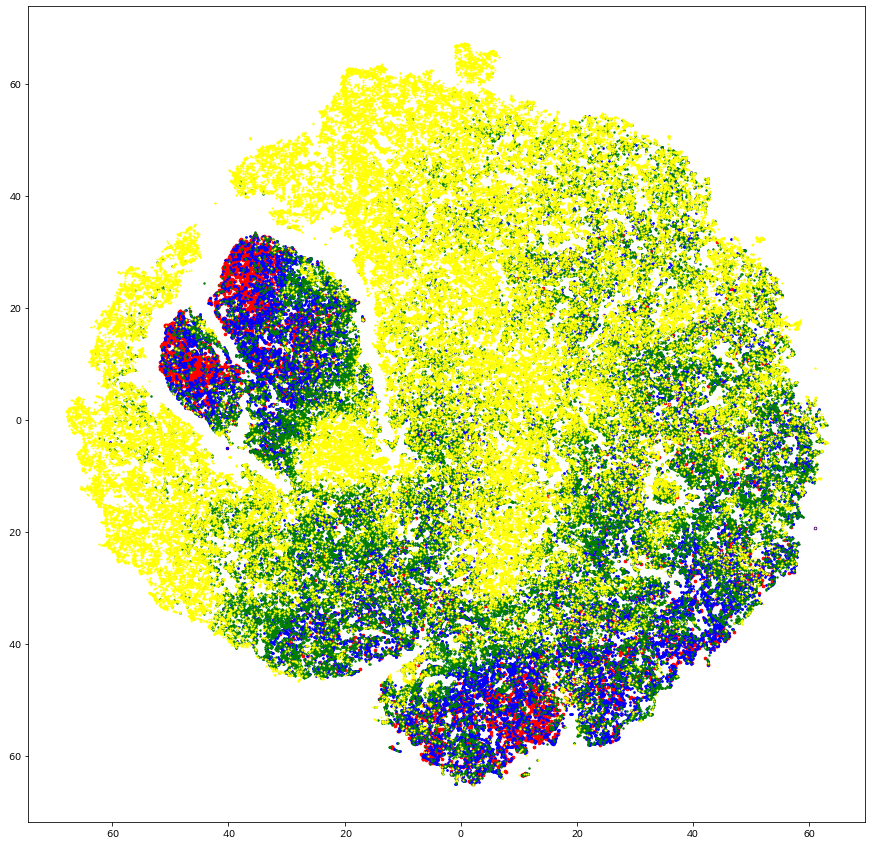

In [ ]:
plt.figure(1, figsize=(15, 15))
plt.scatter(sne_1['tsne1'], sne_1['tsne2'], color='red', s=7)
plt.scatter(sne_2['tsne1'], sne_2['tsne2'], color='blue', s=3)
plt.scatter(sne_3['tsne1'], sne_3['tsne2'], color='green', s=2)
plt.scatter(sne_c['tsne1'], sne_c['tsne2'], color='yellow', s=1)
plt.show()

In [ ]:
tsne = TSNE(random_state=0, n_components=3,perplexity = 50, early_exaggeration = 15, learning_rate = 500)

In [ ]:
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])
tsne_results

,tsne1,tsne2,tsne3
0,14.720171,-8.515225,-10.272262
1,5.948412,7.499971,15.930619
2,4.180510,7.820719,-5.561247
3,-11.223727,-10.318196,-7.268482
4,12.637540,-17.935452,-6.103030
...,...,...,...
169397,-9.020832,-7.321577,-8.947250
169398,-1.178329,1.055335,3.756133
169399,-3.664181,-3.665016,-24.126854
169400,2.716510,-20.007061,-1.142085


In [ ]:
sne = pd.concat([tsne_results, c_rate['CERT_GBN']], axis = 1)
sne

,tsne1,tsne2,tsne3,CERT_GBN
0,14.720171,-8.515225,-10.272262,2등급
1,5.948412,7.499971,15.930619,참가증
2,4.180510,7.820719,-5.561247,참가증
3,-11.223727,-10.318196,-7.268482,참가증
4,12.637540,-17.935452,-6.103030,1등급
...,...,...,...,...
169397,-9.020832,-7.321577,-8.947250,참가증
169398,-1.178329,1.055335,3.756133,참가증
169399,-3.664181,-3.665016,-24.126854,참가증
169400,2.716510,-20.007061,-1.142085,1등급


In [ ]:
sne_1 = sne[sne['CERT_GBN'] == '1등급']
sne_2 = sne[sne['CERT_GBN'] == '2등급']
sne_3 = sne[sne['CERT_GBN'] == '3등급']
sne_c = sne[sne['CERT_GBN'] == '참가증']

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

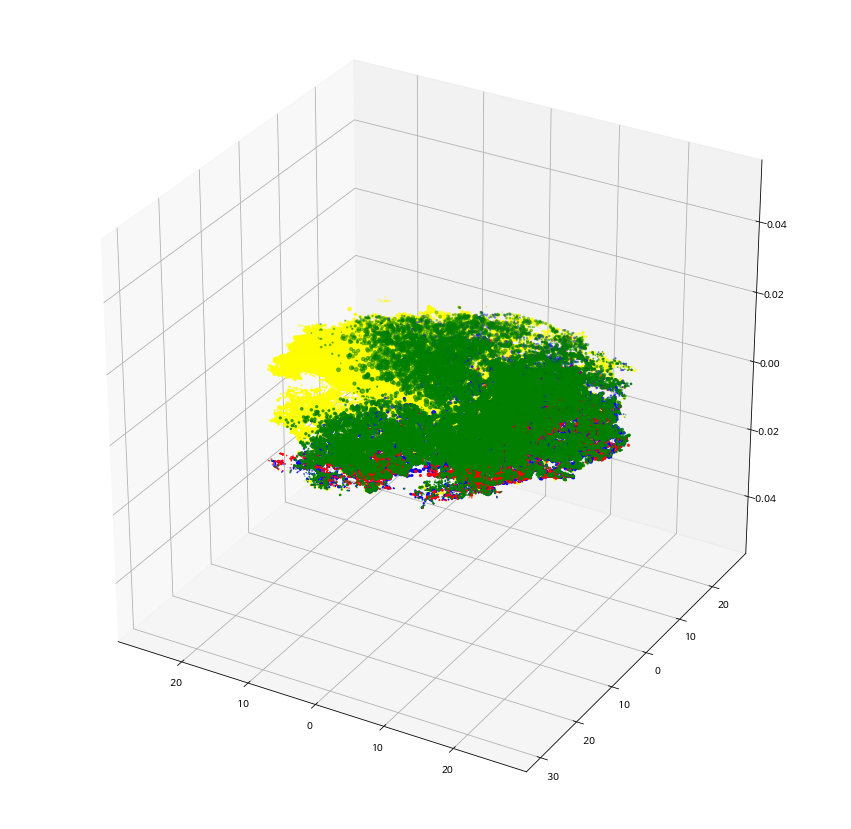

In [ ]:
#lt.figure(1, figsize=(15, 15))
plt.figure(figsize=(15, 15)).gca(projection='3d')
plt.scatter(sne_c['tsne1'], sne_c['tsne2'],sne_c['tsne3'],  color='yellow')
plt.scatter(sne_3['tsne1'], sne_3['tsne2'],sne_3['tsne3'],  color='green')
plt.scatter(sne_1['tsne1'], sne_1['tsne2'],sne_1['tsne3'],  color='red')
plt.scatter(sne_2['tsne1'], sne_2['tsne2'],sne_2['tsne3'],  color='blue')


plt.show()

In [ ]:
sne

,tsne1,tsne2,tsne3,CERT_GBN
0,14.720171,-8.515225,-10.272262,2등급
1,5.948412,7.499971,15.930619,참가증
2,4.180510,7.820719,-5.561247,참가증
3,-11.223727,-10.318196,-7.268482,참가증
4,12.637540,-17.935452,-6.103030,1등급
...,...,...,...,...
169397,-9.020832,-7.321577,-8.947250,참가증
169398,-1.178329,1.055335,3.756133,참가증
169399,-3.664181,-3.665016,-24.126854,참가증
169400,2.716510,-20.007061,-1.142085,1등급


In [ ]:
sne.to_csv('/content/drive/MyDrive/국민체력 100 빅데이터활용 공모전/sne_3.csv')